In [997]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ("ignore")

In [999]:
df_cust=pd.read_csv("customers.csv")

In [1000]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [1001]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,950.000000
mean,500.500000,36.405000,139410.314737
std,288.819436,15.666155,112416.802007
min,1.000000,1.000000,2.000000
25%,250.750000,26.000000,47627.500000
50%,500.500000,32.000000,112218.500000
75%,750.250000,46.000000,193137.500000
max,1000.000000,135.000000,449346.000000


In [1002]:
df_cust.isnull().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

In [1003]:
df_cust[df_cust.annual_income.isnull()].head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,NaN,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,NaN,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,NaN,Married
102,103,Aarav Shah,Male,32,City,Data Scientist,NaN,Married
155,156,Kiaan Saxena,Male,24,City,Fullstack Developer,NaN,Married


In [1004]:
occu_wise_median=df_cust.groupby("occupation")['annual_income'].median()
occu_wise_median

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [1005]:
df_cust['annual_income']=df_cust.apply(
    lambda row:occu_wise_median[row['occupation']] if pd.isnull(row['annual_income'])else row['annual_income'],
    axis=1


    
)

In [1006]:
df_cust.iloc[[14,82]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,45794.0,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,46759.0,Single


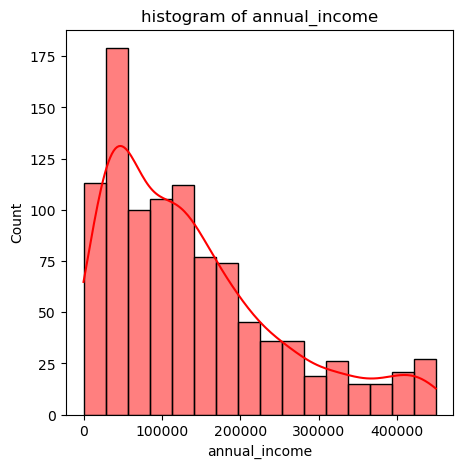

In [1007]:
plt.figure(figsize=(5,5))
sns.histplot(df_cust.annual_income,kde=True,color='Red',label='Data')
plt.title('histogram of annual_income')
plt.show()

In [1008]:
df_cust[df_cust['annual_income']<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
31,32,Veer Mistry,Male,50,City,Business Owner,50.0,Married
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,50.0,Married
316,317,Yuvraj Saxena,Male,47,City,Consultant,50.0,Married
333,334,Avani Khanna,Female,29,City,Data Scientist,50.0,Married
340,341,Priya Sinha,Female,33,Rural,Fullstack Developer,50.0,Married
543,544,Advait Batra,Male,54,City,Consultant,2.0,Married
592,593,Priya Gandhi,Female,32,City,Business Owner,50.0,Married
633,634,Rudra Mehtani,Male,26,City,Data Scientist,2.0,Married
686,687,Vihaan Jaiswal,Male,40,City,Business Owner,2.0,Married
696,697,Ishan Negi,Male,47,City,Consultant,20.0,Married


In [1009]:
df_cust['annual_income']=df_cust.apply(
    lambda row:occu_wise_median[row['occupation']]if row['annual_income']<100 else row['annual_income'],
    axis=1
)

In [1010]:
for index,row in df_cust.iterrows():
    if row['annual_income']<100:
        df_cust.at['index','annual_income']=occu_wise_median[row['occupation']]

In [1011]:
df_cust.at[4,'annual_income']

39406.0

In [1012]:
avg_income_per_occupation=df_cust.groupby('occupation')['annual_income'].mean()
avg_income_per_occupation

occupation
Accountant              64123.562500
Artist                  45309.236842
Business Owner         268447.368512
Consultant              60703.154639
Data Scientist         137021.266304
Freelancer              76327.508772
Fullstack Developer     78727.972973
Name: annual_income, dtype: float64

In [1013]:
avg_income_per_occupation.index

Index(['Accountant', 'Artist', 'Business Owner', 'Consultant',
       'Data Scientist', 'Freelancer', 'Fullstack Developer'],
      dtype='object', name='occupation')

In [1014]:
avg_income_per_occupation.values

array([ 64123.5625    ,  45309.23684211, 268447.36851211,  60703.15463918,
       137021.26630435,  76327.50877193,  78727.97297297])

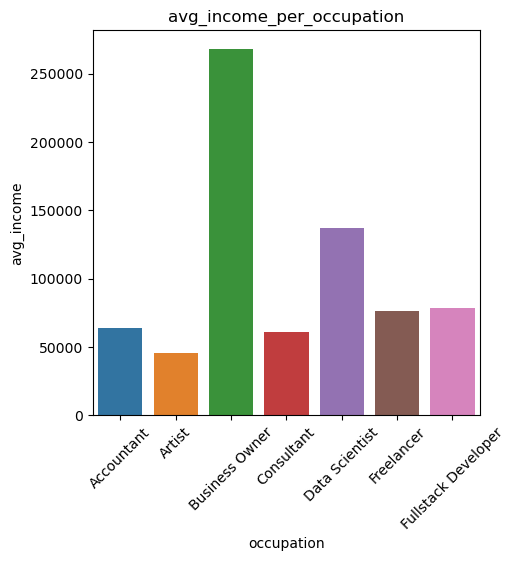

In [1015]:
plt.figure(figsize=(5,5))
sns.barplot(x=avg_income_per_occupation.index,y=avg_income_per_occupation.values,palette='tab10')
plt.xticks(rotation=45)
plt.title('avg_income_per_occupation')
plt.xlabel('occupation')
plt.ylabel('avg_income')
plt.show()

In [1016]:
df_cust.columns

Index(['cust_id', 'name', 'gender', 'age', 'location', 'occupation',
       'annual_income', 'marital_status'],
      dtype='object')

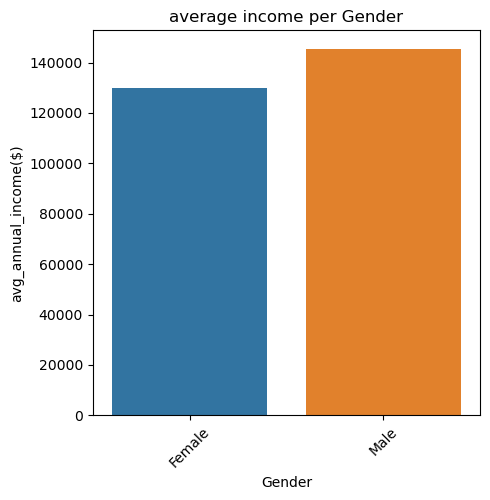

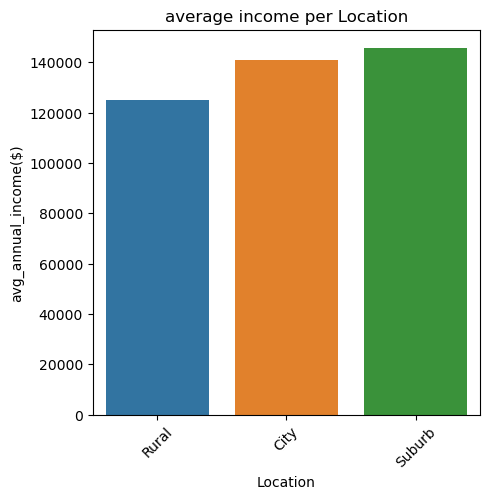

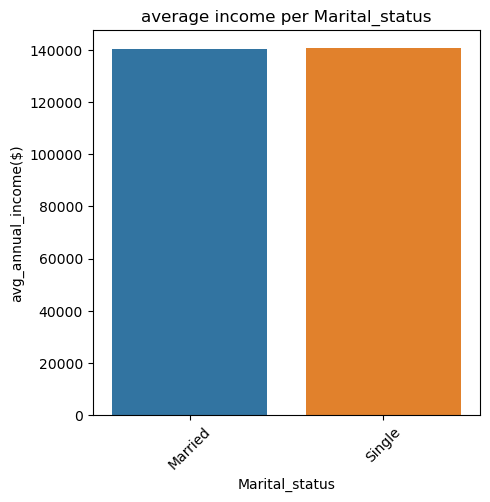

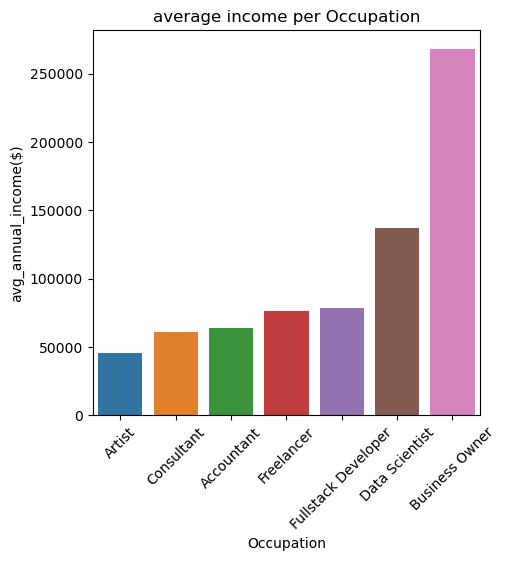

In [1017]:
categorical_columns=['gender','location','marital_status','occupation']
for col in categorical_columns:
    plt.figure(figsize=(5,5))
    avg_income_per_group=df_cust.groupby(col)['annual_income'].mean().sort_values()
    sns.barplot(x=avg_income_per_group.index,y=avg_income_per_group.values,palette='tab10')
    plt.xticks(rotation=45)
    plt.title(f'average income per {col.capitalize()}')
    plt.xlabel(col.capitalize())
    plt.ylabel('avg_annual_income($)')
    plt.show()

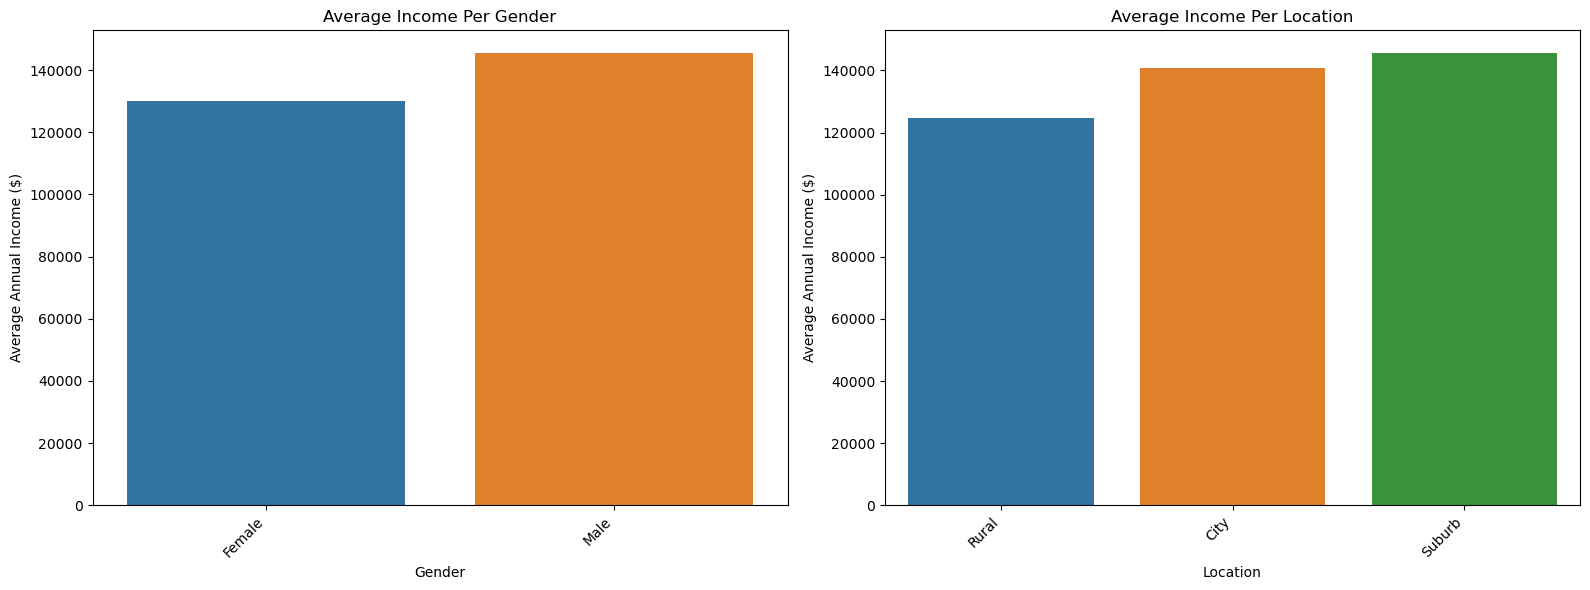

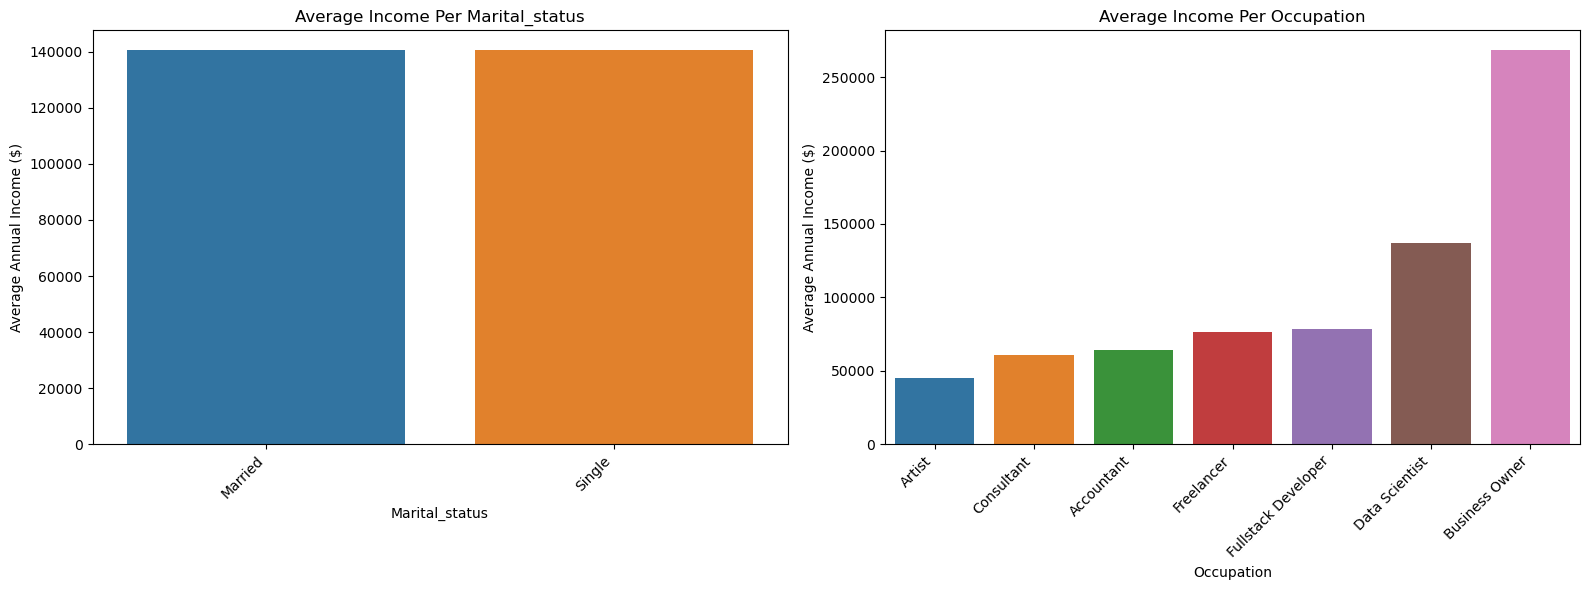

In [1018]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the columns are categorical (if they aren't already)
categorical_columns = ['gender', 'location', 'marital_status', 'occupation']

# Check for missing values and handle them
df_cust = df_cust.dropna(subset=categorical_columns)  # Drop rows with NaN in categorical columns

# Define the number of columns for subplots (2 in this case)
num_cols = 2

# Loop through pairs of categorical columns and plot two at a time
for i in range(0, len(categorical_columns), num_cols):
    # Create a 1x2 grid of subplots
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # Adjust figsize for two plots in a row
    
    for j, col in enumerate(categorical_columns[i:i+num_cols]):
        ax = axes[j]  # Get the current axis (subplot)
        avg_income_per_group = df_cust.groupby(col)['annual_income'].mean().sort_values()  # Group by and calculate mean income
        sns.barplot(x=avg_income_per_group.index, y=avg_income_per_group.values, palette='tab10', ax=ax)
        
        # Rotate x-axis labels and add titles
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  # Rotate labels
        ax.set_title(f'Average Income Per {col.capitalize()}')
        ax.set_xlabel(col.capitalize())
        ax.set_ylabel('Average Annual Income ($)')
    
    # Adjust layout to avoid label overlap
    plt.tight_layout()
    plt.show()


In [1019]:
### treating outliers for age group

In [1020]:
df_cust.age.describe()

count    1000.000000
mean       36.405000
std        15.666155
min         1.000000
25%        26.000000
50%        32.000000
75%        46.000000
max       135.000000
Name: age, dtype: float64

In [1021]:
### according to exercise anything <15 or >80 is an outlier

In [1022]:
df_cust[(df_cust.age<15)|(df_cust.age>80)].shape

(20, 8)

In [1023]:
outliers=df_cust[(df_cust.age<15)|(df_cust.age>80)]
outliers

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married


In [1024]:
df_cust['age'].median()

32.0

In [1025]:
occupation_wise_median_for_age=df_cust.groupby('occupation')['age'].median()
occupation_wise_median_for_age

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

In [1026]:
df_cust['age']=df_cust.apply(
    lambda row: occupation_wise_median_for_age[row['occupation']] if(row['age']<15)|(row['age']>80) else
    row['age'] ,axis=1
)

In [1027]:
df_cust.age.describe()

count    1000.000000
mean       35.541500
std        12.276634
min        18.000000
25%        26.000000
50%        32.000000
75%        44.250000
max        64.000000
Name: age, dtype: float64

In [1028]:
df_cust.loc[[41]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
41,42,Aaryan Shah,Male,26.0,City,Artist,7621.0,Married


In [1029]:
df_cust[(df_cust['age']<15)|(df_cust['age']>65)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [1030]:
###data visualization(Age,gender,location)



In [1031]:
###1 piechart b/w age groups(18-25,26-45,46-65)

In [1032]:
bin_edges=[17,25,45,65]
bin_labels=['17-25','26-45','46-65']
df_cust['age_group']=pd.cut(df_cust['age'],bins=bin_edges,labels=bin_labels)

In [1033]:
df_cust[df_cust['age']==25].head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
9,10,Aditya Choudhary,Male,25.0,Rural,Freelancer,39832.0,Married,17-25
14,15,Sanjana Malik,Female,25.0,Rural,Artist,45794.0,Married,17-25
17,18,Yuvraj Sardar,Male,25.0,City,Data Scientist,10672.0,Married,17-25
61,62,Advait Agarwal,Male,25.0,Rural,Data Scientist,54288.0,Married,17-25
65,66,Aaditya Mhatre,Male,25.0,City,Freelancer,24408.0,Married,17-25


In [1034]:
df_cust['age_group'].value_counts()

age_group
26-45    506
46-65    248
17-25    246
Name: count, dtype: int64

In [1035]:
age_groups_counts=df_cust['age_group'].value_counts(normalize=True)*100
age_groups_counts.reset_index()

,age_group,proportion
0,26-45,50.6
1,46-65,24.8
2,17-25,24.6


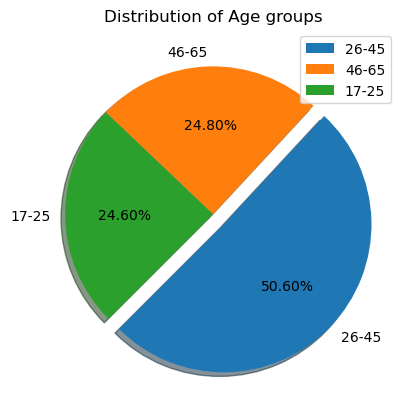

<Figure size 640x480 with 0 Axes>

In [1036]:
plt.pie(age_groups_counts,labels=age_groups_counts.index,autopct='%1.2f%%',shadow=True,explode=(0.1,0,0),startangle=225)
plt.title("Distribution of Age groups")
plt.legend()
plt.show()
plt.savefig('Age_groups.png')

In [1037]:
df_cust.gender.unique()

array(['Female', 'Male'], dtype=object)

In [1038]:
df_counts=df_cust['gender'].value_counts(normalize=True)*100

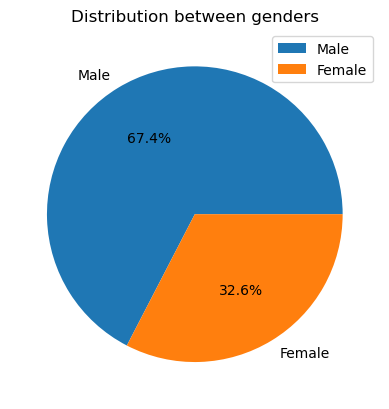

In [1039]:
plt.pie(df_counts,labels=df_counts.index,autopct='%1.1f%%')
plt.title('Distribution between genders')
plt.legend()
plt.show()



In [1040]:
###2 barchart

In [1041]:
df_bar=df_cust.groupby(['location','gender']).size().unstack()

In [1042]:
df_bar

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


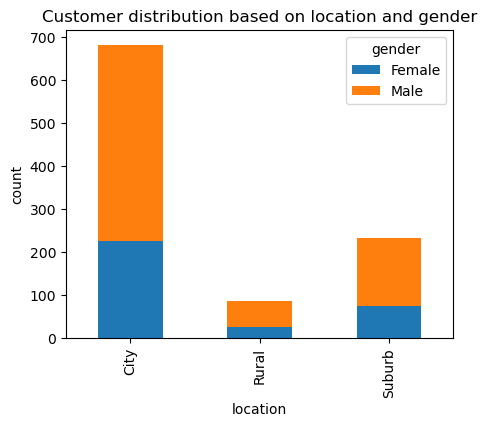

In [1043]:
df_bar.plot(kind='bar',stacked=True,figsize=(5,4))
plt.title('Customer distribution based on location and gender')
plt.ylabel('count')
plt.legend(title='gender')
plt.show()

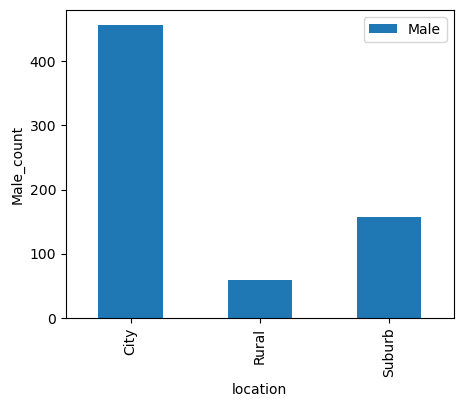

In [1044]:
df_bar['Male'].plot(kind='bar',figsize=(5,4))
plt.ylabel('Male_count')
plt.legend()
plt.show()

In [1045]:
####Data cleaning on credit card table

In [1046]:
df_c=pd.read_csv('credit_profiles.csv')
df_c.shape
df_c['cust_id'].nunique()
df_c.describe()


,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
count,1004.000000,1004.000000,1000.000000,1000.000000,1000.000000,935.000000
mean,500.850598,588.655378,0.498950,9683.597000,1.955000,19235.561497
std,288.315670,152.575244,0.233139,25255.893671,1.414559,24489.997195
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.000000
25%,251.750000,459.000000,0.293917,221.000000,1.000000,750.000000
50%,502.500000,601.000000,0.487422,550.000000,2.000000,1250.000000
75%,749.250000,737.250000,0.697829,11819.500000,3.000000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.000000


In [1047]:
df_c[df_c['cust_id'].duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [1048]:
# droping duplicates

In [1049]:
df_c_clean=df_c.drop_duplicates(subset='cust_id',keep='last')

In [1050]:
#checlking for null

In [1051]:
df_c_clean[df_c_clean['credit_limit'].isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


In [1052]:
#### drawing scatter plot to see relation between credit score and credit limit

Text(0, 0.5, 'credit_score')

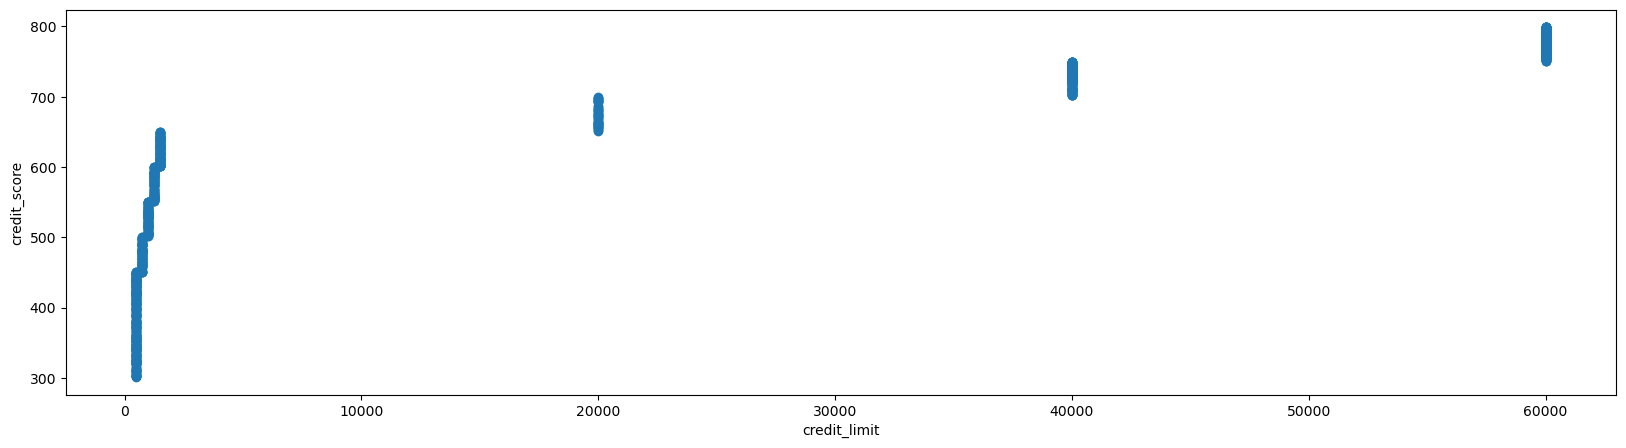

In [1053]:
plt.figure(figsize=(20,5))
plt.scatter(df_c_clean['credit_limit'],df_c_clean['credit_score'])
plt.xlabel('credit_limit')
plt.ylabel('credit_score')

In [1054]:
bin_edges=[300,350,400,450,500,550,600,650,700,750,800]
bin_labels = [f"{bin_edges[i]}-{bin_edges[i+1]}" for i in range(len(bin_edges)-1)]
df_c_clean['credit_score_range']=pd.cut(df_c_clean['credit_score'],bins=bin_edges,labels=bin_labels)

In [1055]:
df_c_clean.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-750
1,2,587,0.107928,161644.0,2.0,1250.0,550-600
2,3,544,0.854807,513.0,4.0,1000.0,500-550
3,4,504,0.336938,224.0,2.0,1000.0,500-550
4,5,708,0.586151,18090.0,2.0,40000.0,700-750


In [1056]:
mode_df=df_c_clean.groupby('credit_score_range')['credit_limit'].agg(lambda x:x.mode().iloc[0]).reset_index()

In [1057]:
mode_df

,credit_score_range,credit_limit
0,300-350,500.0
1,350-400,500.0
2,400-450,500.0
3,450-500,750.0
4,500-550,1000.0
5,550-600,1250.0
6,600-650,1500.0
7,650-700,20000.0
8,700-750,40000.0
9,750-800,60000.0


In [1058]:
df_c_clean_1=pd.merge(df_c_clean,mode_df,on='credit_score_range',suffixes=('','_mode'))

In [1059]:
df_c_clean_1['credit_limit'].fillna(df_c_clean_1['credit_limit_mode'],inplace=True)

In [1060]:
df_c_clean_2 = df_c_clean_1.copy() 


In [1061]:
df_c_clean_2[df_c_clean_2.isnull().any(axis=1)]


,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode


In [1062]:
### we have outliers in outstanding debts
# cleaning outliers

In [1063]:
df_c_clean_2.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,500.323323,589.471471,0.498663,9692.948949,1.955956,19752.752753,19752.752753
std,288.910029,152.085696,0.233079,25266.811373,1.414944,24722.506641,24722.506641
min,1.000000,301.000000,0.103761,33.000000,0.000000,500.000000,500.000000
25%,250.500000,460.000000,0.293785,221.000000,1.000000,750.000000,750.000000
50%,500.000000,602.000000,0.487290,551.000000,2.000000,1500.000000,1500.000000
75%,750.500000,738.000000,0.697670,11839.000000,3.000000,40000.000000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.000000,60000.000000


In [1064]:
outliers=df_c_clean_2[df_c_clean_2['outstanding_debt']>df_c_clean_2['credit_limit']]

In [1065]:
outliers.shape

(20, 8)

In [1066]:
df_c_clean_2.loc[outliers.index, 'outstanding_debt'] = df_c_clean_2.loc[outliers.index, 'credit_limit']


In [1067]:
df_c_clean_2.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,500.323323,589.471471,0.498663,6856.599600,1.955956,19752.752753,19752.752753
std,288.910029,152.085696,0.233079,10686.836626,1.414944,24722.506641,24722.506641
min,1.000000,301.000000,0.103761,33.000000,0.000000,500.000000,500.000000
25%,250.500000,460.000000,0.293785,221.000000,1.000000,750.000000,750.000000
50%,500.000000,602.000000,0.487290,543.000000,2.000000,1500.000000,1500.000000
75%,750.500000,738.000000,0.697670,10942.000000,3.000000,40000.000000,40000.000000
max,1000.000000,799.000000,0.899648,60000.000000,4.000000,60000.000000,60000.000000


In [1068]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,46-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,46-65
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,17-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,17-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,46-65


In [1069]:
df_c_clean_2.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,700-750,40000.0
1,2,587,0.107928,1250.0,2.0,1250.0,550-600,1250.0
2,3,544,0.854807,513.0,4.0,1000.0,500-550,1000.0
3,4,504,0.336938,224.0,2.0,1000.0,500-550,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0,700-750,40000.0


In [1070]:
### correlation b/w numercial col

In [1071]:
df_merged_1=df_cust.merge(df_c_clean_2,on='cust_id',how='inner')

In [1072]:
df_merged_1.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,46-65,749,0.585171,19571.0,0.0,40000.0,700-750,40000.0
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,46-65,587,0.107928,1250.0,2.0,1250.0,550-600,1250.0
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,17-25,544,0.854807,513.0,4.0,1000.0,500-550,1000.0
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,17-25,504,0.336938,224.0,2.0,1000.0,500-550,1000.0
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,46-65,708,0.586151,18090.0,2.0,40000.0,700-750,40000.0


In [1074]:
numerical_col=['annual_income','credit_score','credit_utilisation','outstanding_debt','credit_limit',]

In [1075]:
correlation_matrix=df_merged_1[numerical_col].corr()

In [1076]:
correlation_matrix

,annual_income,credit_score,credit_utilisation,outstanding_debt,credit_limit
annual_income,1.000000,0.575794,-0.085740,0.555506,0.684653
credit_score,0.575794,1.000000,-0.068281,0.680852,0.848261
credit_utilisation,-0.085740,-0.068281,1.000000,0.193771,-0.079631
outstanding_debt,0.555506,0.680852,0.193771,1.000000,0.810502
credit_limit,0.684653,0.848261,-0.079631,0.810502,1.000000


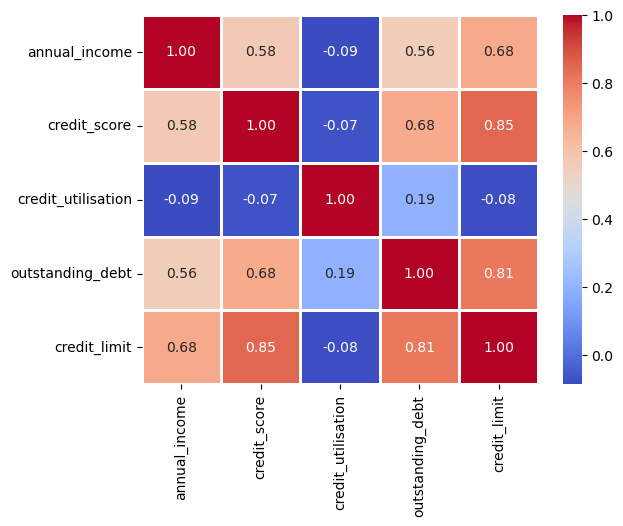

In [1077]:
sns.heatmap(correlation_matrix,annot=True,fmt='.2f',cmap='coolwarm',linewidth=.8)
plt.show()

In [1078]:
###Transaction table
### Null values


In [1079]:
df_trans=pd.read_csv("transactions.csv")
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [1080]:
df_trans.isnull().sum()


tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [1081]:
df_trans[df_trans['platform'].isnull()].sample(5)

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
102713,102714,816,2023-02-20,14,NaN,Fashion & Apparel,Gpay
70885,70886,535,2023-02-05,41,NaN,Fashion & Apparel,Net Banking
376083,376084,242,2023-07-06,37,NaN,Home Decor,Credit Card
46389,46390,296,2023-01-23,70,NaN,Fashion & Apparel,Debit Card
95406,95407,665,2023-02-17,14,NaN,Beauty & Personal Care,Debit Card


In [1082]:
df_trans.platform.unique()

array(['Flipkart', 'Alibaba', 'Shopify', 'Amazon', 'Ebay', 'Meesho',
       'Cred', nan], dtype=object)

In [1083]:
df_trans.platform.mode()

0    Amazon
Name: platform, dtype: object

In [1084]:
df_trans.platform.value_counts()

platform
Amazon      151443
Flipkart    122660
Alibaba      73584
Meesho       73271
Shopify      39416
Cred         24741
Ebay          9944
Name: count, dtype: int64

In [1085]:
df_trans['platform'] = df_trans['platform'].apply(lambda x: 'Amazon' if pd.isnull(x) else x)


In [1086]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [1087]:
df_trans.fillna('Amazon',inplace=True)

In [1088]:
###visualization of platform column


<Axes: xlabel='count', ylabel='platform'>

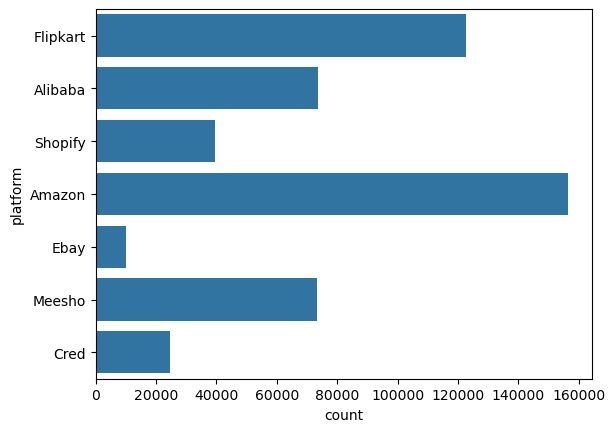

In [1089]:
sns.countplot(y='platform',data=df_trans)

In [1090]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711634,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [1091]:
###min trans_amount is $1 so we need to replace 0 with another relevant number

In [1092]:
df_trans[df_trans['tran_amount']==0]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card
533,534,891,2023-01-01,0,Amazon,Electronics,Credit Card
586,587,108,2023-01-01,0,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499326,499327,695,2023-09-05,0,Amazon,Electronics,Credit Card
499494,499495,295,2023-09-05,0,Amazon,Electronics,Credit Card
499708,499709,141,2023-09-05,0,Amazon,Electronics,Credit Card
499928,499929,4,2023-09-05,0,Amazon,Electronics,Credit Card


In [1093]:
# Here all the trans amount have one thing in comon that all rows have same platform ,same product category and samme payment type
#1st i gonna create new dataframe with  platform==Amazon ,product category as Electronic and payment type as credit card
# and then i get mean for that data frame and replace it with 0 trans amount

In [1094]:
df_no_zeros=df_trans.loc[(df_trans['platform'] == 'Amazon') & 
              (df_trans['product_category'] == 'Electronics') & 
              (df_trans['payment_type'] == 'Credit Card')&(df_trans['tran_amount']>0)]
              
df_no_zeros

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
173,174,676,2023-01-01,60439,Amazon,Electronics,Credit Card
190,191,763,2023-01-01,697,Amazon,Electronics,Credit Card
263,264,528,2023-01-01,421,Amazon,Electronics,Credit Card
311,312,936,2023-01-01,537,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499766,499767,723,2023-09-05,909,Amazon,Electronics,Credit Card
499793,499794,586,2023-09-05,304,Amazon,Electronics,Credit Card
499812,499813,688,2023-09-05,425,Amazon,Electronics,Credit Card
499860,499861,373,2023-09-05,480,Amazon,Electronics,Credit Card


In [1095]:
median_to_replace=df_no_zeros['tran_amount'].median()

In [1096]:
median_to_replace

554.0

In [1097]:
df_trans['tran_amount'].replace(0, median_to_replace, inplace=True)

In [1098]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,3230.452602
std,144337.711634,288.641924,13097.561071
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,66.000000
50%,250000.500000,502.000000,146.000000
75%,375000.250000,752.000000,413.000000
max,500000.000000,1000.000000,69999.000000


In [1099]:
###treating max outliers
#for that 1st lets visualize it in normal distribution


<Axes: xlabel='tran_amount', ylabel='Count'>

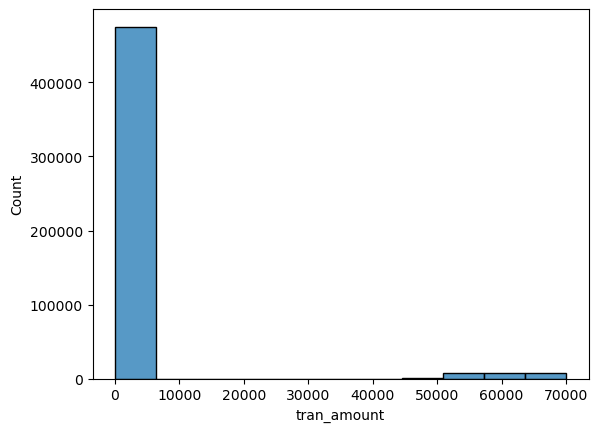

In [1100]:
sns.histplot(df_trans.tran_amount,bins=11)

In [1101]:
###we can clearly see the outliers here and it is right skewed so we can use iqr to find outliers

In [1102]:
Q1,Q3=df_trans['tran_amount'].quantile([0.25,0.75])

In [1103]:
Q1,Q3

(66.0, 413.0)

In [1104]:
IQR=Q3-Q1

In [1105]:
IQR

347.0

In [1106]:
lower=Q1-2*IQR
upper=Q3+2*IQR
lower,upper

(-628.0, 1107.0)

In [1107]:
outliers=df_trans[(df_trans['tran_amount']>upper)]

In [1108]:
outliers

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,61963,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,57869,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,58574,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,51669,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,55131,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,59679,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,60184,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,54678,Meesho,Sports,Gpay


In [1109]:
### now we take mean of the data frame with no outliers for that we have to create a new data frame with no outliers 

In [1110]:
no_outliers=df_trans[(df_trans['tran_amount']<upper)]

In [1111]:
no_outliers

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking
...,...,...,...,...,...,...,...
499994,499995,679,2023-09-05,59,Ebay,Beauty & Personal Care,Gpay
499995,499996,791,2023-09-05,43,Amazon,Books,Phonepe
499997,499998,57,2023-09-05,224,Amazon,Garden & Outdoor,Phonepe
499998,499999,629,2023-09-05,538,Flipkart,Home Decor,Gpay


In [1112]:
mean_to_replace=no_outliers.groupby('product_category')['tran_amount'].mean()
mean_to_replace

product_category
Beauty & Personal Care     92.167205
Books                      29.553515
Electronics               510.172685
Fashion & Apparel          64.553463
Garden & Outdoor          125.630277
Home Decor                302.487561
Kitchen Appliances        176.773288
Sports                    269.181631
Toys & Games               50.333298
Name: tran_amount, dtype: float64

In [1113]:
df_trans.loc[outliers.index,['tran_amount']]=outliers['product_category'].map(mean_to_replace)

In [1114]:
df_trans.loc[outliers.index]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,92.167205,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,50.333298,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,176.773288,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,64.553463,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,176.773288,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,64.553463,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,64.553463,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,269.181631,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,269.181631,Meesho,Sports,Gpay


In [1115]:
df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.000000
mean,250000.500000,501.400428,240.672998
std,144337.711634,288.641924,241.696597
min,1.000000,1.000000,2.000000
25%,125000.750000,252.000000,64.553463
50%,250000.500000,502.000000,133.000000
75%,375000.250000,752.000000,349.000000
max,500000.000000,1000.000000,999.000000


In [1116]:
#### Data visualization of transaction Table

In [1117]:
###we want to se this by different age groups for that we need to merge this table dataframe with previous ones 


In [1118]:
df_merged_new=pd.merge(df_merged_1,df_trans,on='cust_id',how='inner')


In [1119]:
df_merged_new

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,credit_score,...,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,46-65,749,...,0.0,40000.0,700-750,40000.0,1283,2023-01-01,30.0,Shopify,Fashion & Apparel,Net Banking
1,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,46-65,749,...,0.0,40000.0,700-750,40000.0,1382,2023-01-01,96.0,Amazon,Sports,Debit Card
2,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,46-65,749,...,0.0,40000.0,700-750,40000.0,1521,2023-01-01,86.0,Meesho,Garden & Outdoor,Gpay
3,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,46-65,749,...,0.0,40000.0,700-750,40000.0,1576,2023-01-01,149.0,Amazon,Beauty & Personal Care,Phonepe
4,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,46-65,749,...,0.0,40000.0,700-750,40000.0,1757,2023-01-01,37.0,Flipkart,Fashion & Apparel,Credit Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499472,1000,Akshay Choudhary,Male,28.0,City,Freelancer,226873.0,Married,26-45,775,...,1.0,60000.0,750-800,60000.0,495592,2023-09-03,63.0,Shopify,Fashion & Apparel,Gpay
499473,1000,Akshay Choudhary,Male,28.0,City,Freelancer,226873.0,Married,26-45,775,...,1.0,60000.0,750-800,60000.0,495907,2023-09-03,743.0,Alibaba,Electronics,Phonepe
499474,1000,Akshay Choudhary,Male,28.0,City,Freelancer,226873.0,Married,26-45,775,...,1.0,60000.0,750-800,60000.0,496570,2023-09-04,20.0,Cred,Books,Credit Card
499475,1000,Akshay Choudhary,Male,28.0,City,Freelancer,226873.0,Married,26-45,775,...,1.0,60000.0,750-800,60000.0,497591,2023-09-04,558.0,Alibaba,Home Decor,Net Banking


<Axes: xlabel='payment_type', ylabel='percent'>

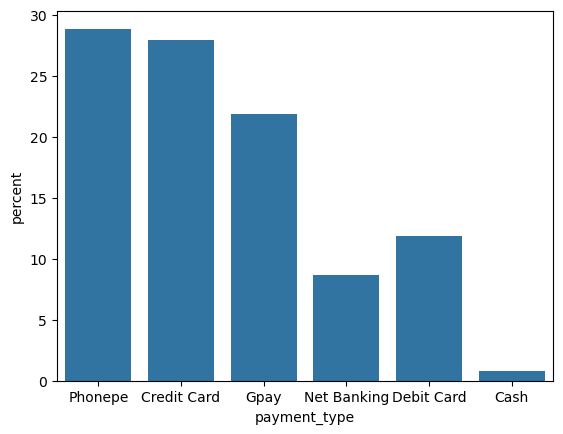

In [1120]:
sns.countplot(x=df_trans['payment_type'],stat='percent')

In [1121]:
###but you want to see b/w age groups

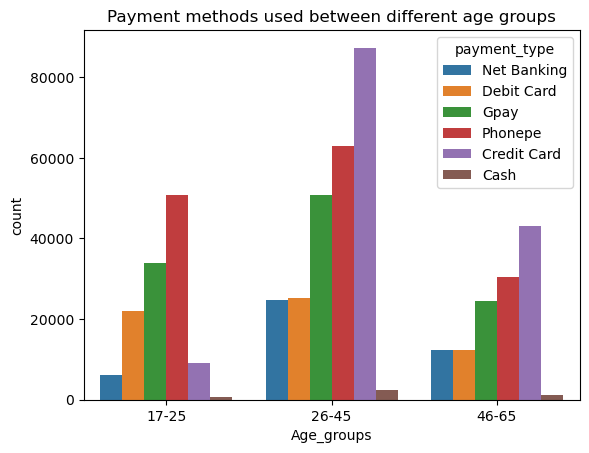

In [1122]:
sns.countplot(x='age_group',hue='payment_type',data=df_merged_new)
plt.title('Payment methods used between different age groups')
plt.xlabel('Age_groups')
plt.ylabel('count')
plt.legend(title='payment_type')
plt.show()

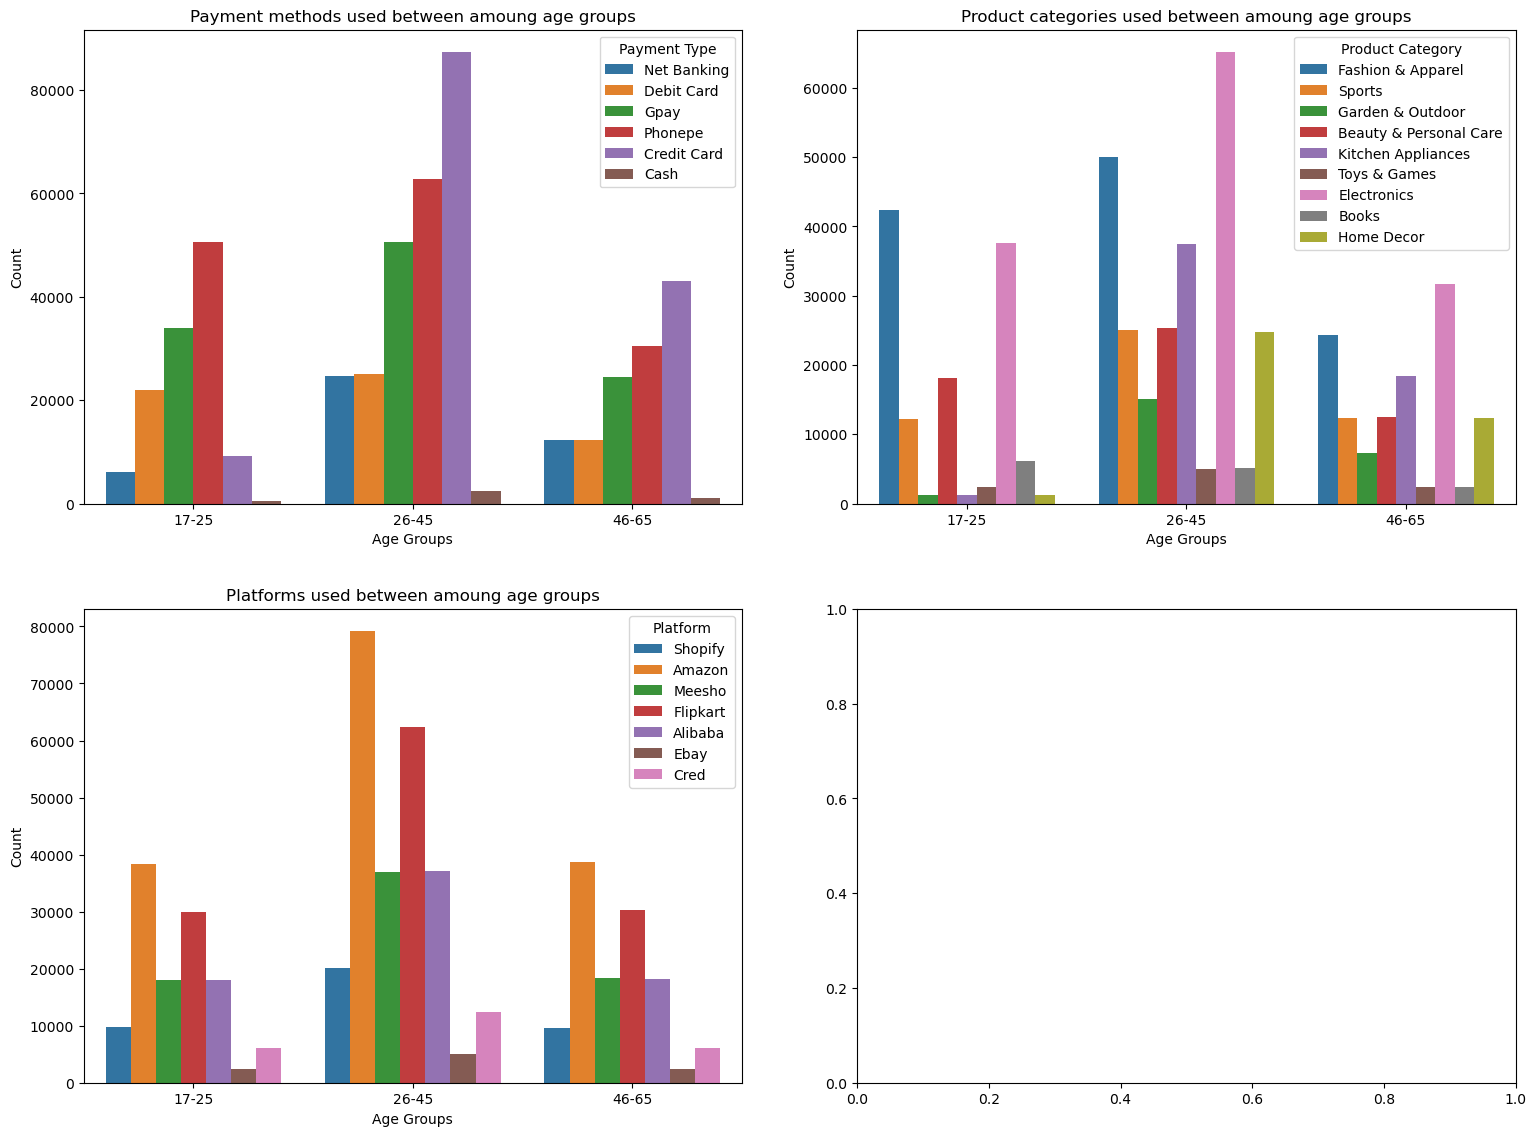

In [1123]:
fig, ax = plt.subplots(2, 2, figsize=(16, 12))  # Create 2x2 grid of subplots

# Plot 1: Payment methods used between different age groups
sns.countplot(x='age_group', hue='payment_type', data=df_merged_new, ax=ax[0, 0])
ax[0, 0].set_title('Payment methods used between amoung age groups')
ax[0, 0].set_xlabel('Age Groups')
ax[0, 0].set_ylabel('Count')
ax[0, 0].legend(title='Payment Type', loc='upper right')

# Plot 2: Platforms used between different age groups
sns.countplot(x='age_group', hue='platform', data=df_merged_new, ax=ax[1, 0])
ax[1, 0].set_title('Platforms used between amoung age groups')
ax[1, 0].set_xlabel('Age Groups')
ax[1, 0].set_ylabel('Count')
ax[1, 0].legend(title='Platform', loc='upper right')

# Plot 3: Product categories used between different age groups
sns.countplot(x='age_group', hue='product_category', data=df_merged_new, ax=ax[0, 1])
ax[0, 1].set_title('Product categories used between amoung age groups')
ax[0, 1].set_xlabel('Age Groups')
ax[0, 1].set_ylabel('Count')
ax[0, 1].legend(title='Product Category', loc='upper right')

# Optional: Plot 4 for additional analysis if necessary
# Example: sns.countplot(x='age_group', hue='another_column', data=df_merged_new, ax=ax[1, 1])
# ax[1, 1].set_title('Another Category Distribution')
# ax[1, 1].set_xlabel('Age Groups')
# ax[1, 1].set_ylabel('Count')

plt.tight_layout(pad=3.0)  # Automatically adjust the spacing between subplots with padding to prevent clipping
plt.show()


In [1124]:
###our target would be age groups b/w 17-25 because they are not using any crdit cards ,we can target them by providing credit cards 
###Age group b/w 17-25 mostly interested buying in amazon , so we can give them better cashbacks in on;line shopping or particularly in amazon to attract 
#them
###They are buying more of fashion and apparel and electronics so giving discounts and cashbacks on this products might attract them 

In [1125]:
from IPython.core.display import HTML

HTML("<h2 align='center' style='color:purple'>Phase 2: Atliquo Bank Credit Card Project</h2>")


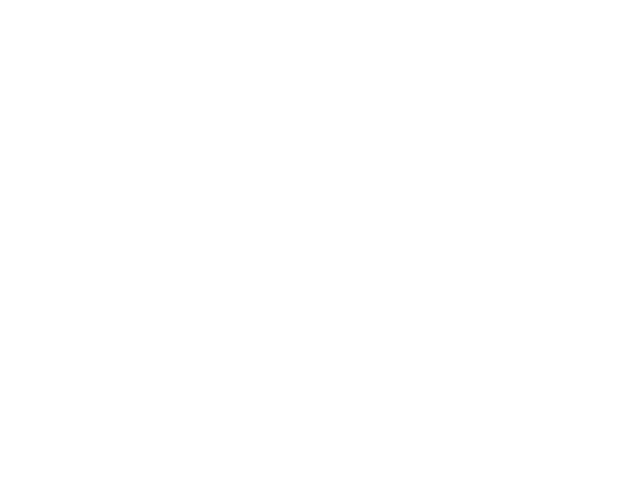

In [1126]:
from IPython.display import Image

# Display the saved image
Image('Age_groups.png')


In [1127]:
!pip install statsmodels


In [1128]:
###insights from above code

In [1133]:
!pip install statsmodels


In [1137]:
import statsmodels.stats.api as sms
import statsmodels.api as sm
from scipy import stats as st

In [ ]:
####Campaign Planning


In [1139]:
###Deciding the sample size

In [1173]:
alpha=0.05
power=0.8
effect_size=[0.1,0.2,0.3,0.4,0.5,1.0]

for effect_sizes in effect_size:
    Sample_size=sms.tt_ind_solve_power(
        effect_size=effect_sizes,
    alpha=alpha,
    power=power,
    ratio=1,
    alternative='two-sided',
    )
    print(f'effect_size{effect_sizes},Required Sample{Sample_size:.2f},: customers')

effect_size0.1,Required Sample1570.73,: customers
effect_size0.2,Required Sample393.41,: customers
effect_size0.3,Required Sample175.38,: customers
effect_size0.4,Required Sample99.08,: customers
effect_size0.5,Required Sample63.77,: customers
effect_size1.0,Required Sample16.71,: customers


In [1171]:
###.2f is 2 fraction 

In [1175]:
###we are taking 0.4 effect size becvcause our product manager wants to give it to 100 people only

In [1177]:
###Between age groups 18-24 we have 246 customers from that 
### we released new credit car to 100 people with some incentives ,but from that 100 only 40 people are staqrted using it 
###this 40 customers comes under test group 
###Now we take another 40 customers which are not part of 100 customers we choose at first ,but in age groups 18-24 this comes under Control group

In [1179]:
###Hypothesis Testing and decision makeing

In [1181]:
###From the team we got a data frame with campaign table control_grp_avg_transaaction and test_grp_avg_transaction

In [1184]:
df=pd.read_csv('avg_transactions_after_campaign.csv')

In [1196]:
df.shape

(62, 3)

In [1198]:
df[df['test_group_avg_tran']>df['control_group_avg_tran']].shape

(44, 3)

In [1200]:
### We can clearly see that test group daily avg transaction is greater then control daily avg transaction in 44 days out of 62 days

In [1202]:
### But we cant conclude directly , we need to prove it by some statistics
### For that swe can use AB hypothesis testing between Test group and Control group

<Axes: xlabel='test_group_avg_tran', ylabel='Count'>

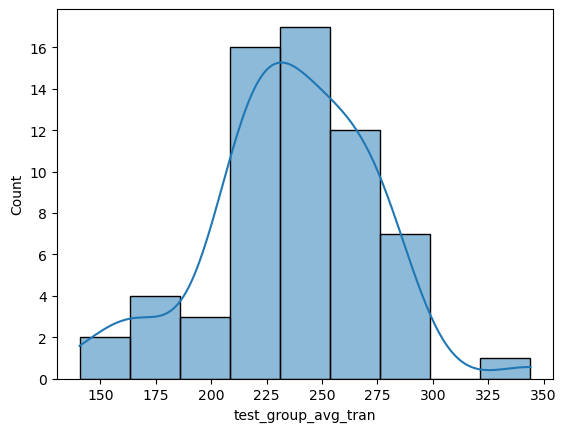

In [1208]:
sns.histplot(df['test_group_avg_tran'],kde=True)

<Axes: xlabel='control_group_avg_tran', ylabel='Count'>

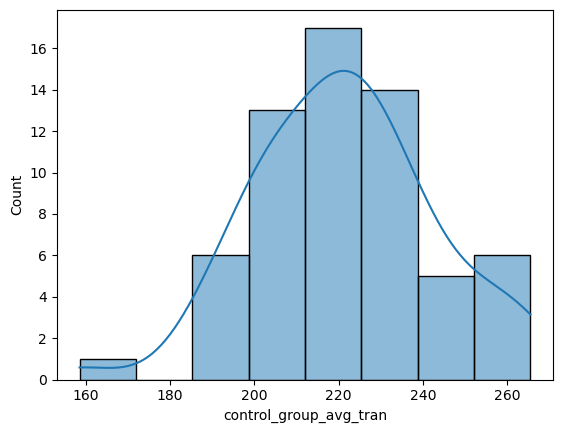

In [1210]:
sns.histplot(df['control_group_avg_tran'],kde=True)

In [1226]:
###we have a sample >30 and we can replace pop_varience with sampple varience so we can use Z_test ,and also we can use Rejection REgion and P_value

In [1228]:
###H0 :New credit card  is performing equal to old credit card
###Ha:New credit card is performing better then old credit card

In [1230]:
###test_group_avg_tran column
s1_mean=df.test_group_avg_tran.mean()
s1_std=df.test_group_avg_tran.std()
s1_count=df.shape[0]
s1_mean,s1_std,s1_count

(235.9835483870968, 36.65808210918637, 62)

In [1238]:
###control_group_avg_tran column
s2_mean=df.control_group_avg_tran.mean()
s2_mean=df.control_group_avg_tran.mean()
s2_count=df.shape[0]
s2_mean,s2_std,s2_count

(221.1751612903226, 21.359192112027014, 62)

In [1240]:
### we finding Z_score of this sample
###Z_score=x-u/sqrt(a+b)
###x=abs(s1_mean-s2_mean )
###U=0 (Assuming H0 is true mean will be 0)
###a= std**2/s1_count
### b=s2_std**2/s2_count

In [1246]:
a= s1_std**2/s1_count
b=s2_std**2/s2_count
a,b

(21.67443522457822, 7.358307865781887)

In [1250]:
z_score=(s1_mean-s2_mean)/np.sqrt(a+b)

In [1252]:
z_score

2.7482973745691135

In [1262]:
###Rejection Region

In [1264]:
alpha=0.05

In [1266]:
z_critical=st.norm.ppf(1-alpha)

In [1268]:
z_critical

1.6448536269514722

In [1270]:
z_score>z_critical

True

In [1260]:
###H0 is Rejected because z_score falls in Rejection Region

In [1272]:
###p_value

In [1276]:
p_value=1-st.norm.cdf(z_score)

In [1278]:
p_value

0.0029952824622024865

In [1282]:
p_value<alpha

True

In [1284]:
###H0 is Rejected

In [1286]:
###Indeed new card is performing well compared to ild credit card
